-
-
**- PROJETO DE SAD**

  Fabio Lopes : 20160449
  
  Luis Godinho: 20160416
  
  Manuel Sousa: 20160417

-
-
--


In [6]:

from google.colab import files, drive
#drive.mount('/content/gdrive')
uploaded = files.upload()

Saving All_GPUs.csv to All_GPUs (1).csv


In [0]:
#IMPORTS
import pandas as pd
import io
import math
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:



#gpu_raw=pd.read_csv('content/gdrive/My Drive/All_GPUs.csv')


gpu_raw = pd.read_csv(io.StringIO(uploaded['All_GPUs.csv'].decode('utf-8')))
#gpu.head()
gpu_raw.Manufacturer.unique()

array(['Nvidia', 'AMD', 'Intel', 'ATI'], dtype=object)

# New Section

Isto vai ser o nosso dataset inicial, com informação de quase todos as graficas que sairam no mercado (3406 GPUs).

O objetivo será prever o seu preço de lançamento de acordo com os dados respetivos da placa gráfica, por isso o Target deste problema será o "Release_Price", e o restante as features.

In [9]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
gpu_raw

,Architecture,Best_Resolution,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,Direct_X,DisplayPort_Connection,HDMI_Connection,Integrated,L2_Cache,Manufacturer,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Memory_Type,Name,Notebook_GPU,Open_GL,PSU,Pixel_Rate,Power_Connector,Process,ROPs,Release_Date,Release_Price,Resolution_WxH,SLI_Crossfire,Shader,TMUs,Texture_Rate,VGA_Connection
0,Tesla G92b,NaN,NaN,738 MHz,2.0,Yes,DX 10.0,NaN,0.0,No,0KB,Nvidia,141 Watts,1024 MB,64GB/sec,256 Bit,1000 MHz,GDDR3,GeForce GTS 150,No,3.3,450 Watt & 38 Amps,12 GPixel/s,None,55nm,16,\n01-Mar-2009,NaN,2560x1600,Yes,4.0,64.0,47 GTexel/s,0.0
1,R600 XT,1366 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,215 Watts,512 MB,106GB/sec,512 Bit,828 MHz,GDDR3,Radeon HD 2900 XT 512MB,No,3.1,550 Watt & 35 Amps,12 GPixel/s,None,80nm,16,\n14-May-2007,NaN,2560x1600,Yes,4.0,16.0,12 GTexel/s,0.0
2,R600 PRO,1366 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,200 Watts,512 MB,51.2GB/sec,256 Bit,800 MHz,GDDR3,Radeon HD 2900 Pro,No,3.1,550 Watt & 35 Amps,10 GPixel/s,None,80nm,16,\n07-Dec-2007,NaN,2560x1600,Yes,4.0,16.0,10 GTexel/s,0.0
3,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,NaN,256 MB,36.8GB/sec,128 Bit,1150 MHz,GDDR4,Radeon HD 2600 XT Diamond Edition,No,3.3,NaN,3 GPixel/s,None,65nm,4,\n01-Jul-2007,NaN,2560x1600,Yes,4.0,8.0,7 GTexel/s,0.0
4,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,45 Watts,256 MB,22.4GB/sec,128 Bit,700 MHz,GDDR3,Radeon HD 2600 XT,No,3.1,400 Watt & 25 Amps,3 GPixel/s,None,65nm,4,\n28-Jun-2007,NaN,2560x1600,Yes,4.0,8.0,6 GTexel/s,0.0
5,RV630,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,50 Watts,256 MB,35.2GB/sec,128 Bit,1100 MHz,GDDR4,Radeon HD 2600 XT 256MB GDDR4,No,3.3,400 Watt & 26 Amps,3 GPixel/s,None,65nm,4,\n26-Jun-2007,NaN,2560x1600,Yes,4.0,8.0,6 GTexel/s,0.0
6,R700 RV790 XT,1920 x 1080,NaN,870 MHz,1.0,Yes,DX 10.1,NaN,1.0,No,0KB,AMD,190 Watts,2048 MB,134.4GB/sec,256 Bit,1050 MHz,GDDR5,Radeon HD 4890 Sapphire Vapor-X OC 2GB Edition,No,3.3,500 Watt & 37 Amps,14 GPixel/s,2x 6-pin,55nm,16,\n13-Jul-2009,NaN,2560x1600,Yes,4.1,40.0,35 GTexel/s,1.0
7,R600 GT,1024 x 768,NaN,\n-,2.0,Yes,DX 10,NaN,0.0,No,0KB,AMD,150 Watts,256 MB,51.2GB/sec,256 Bit,800 MHz,GDDR3,Radeon HD 2900 GT,No,3.1,550 Watt & 30 Amps,7 GPixel/s,None,80nm,12,\n06-Nov-2007,NaN,2560x1600,Yes,4.0,12.0,7 GTexel/s,0.0
8,Pitcairn XT GL,1920 x 1080,NaN,\n-,0.0,Yes,DX 11.2,NaN,0.0,No,0KB,AMD,150 Watts,2048 MB,160GB/sec,256 Bit,1250 MHz,GDDR5,FirePro D300,No,4.3,500 Watt & 20 Amps,25 GPixel/s,None,28nm,32,\n18-Jan-2014,NaN,4096x2160,Yes,5.0,80.0,62 GTexel/s,0.0
9,RV100,NaN,NaN,\n-,NaN,Yes,DX 7,NaN,NaN,No,0KB,AMD,32 Watts,64 MB,2.9GB/sec,64 Bit,366 MHz,DDR,Radeon 7000 64mb,No,1.4,NaN,NaN,None,NaN,NaN,\n02-Jan-2001,NaN,1600x1200,No,1.0,NaN,NaN,NaN


In [10]:
display('Dimensionalidade: ' + str(len(gpu_raw.columns)))

print('\n')
display('Tamanho')
gpu_raw.shape

'Dimensionalidade: 34'

'Tamanho'

(3406, 34)

**Resolução**

      Architecture: 
  
      Best_Resolution: Width x Height / discreto
  
      Boost_Clock: Mhz / discreto
  
      Core_Speed: Mhz / discreto
  
      DVI_Connection: unidade / discreto
  
      Dedicated: Yes/No / binario
  
      Direct_X: DX / discreto
  
      DisplayPort_Connection: Unidade / discreto
  
      HDMI:Connection: Unidade / discreto
  
      Integrated: Yes/No / discreto
  
      L2_Cache: KB / discreto
  
      Manufacturer: Nvidia/Amd / discreto
  
      Max_Power: Watts / discreto
  
      Memory: MB / discreto
  
      Memory_Bacdwidth: GB/sec / discreto
  
      Memory_Bus: Bit / discreto
  
      Memory_Speed: Mhz / discreto
  
      Memory_Type: DDR / discreto
  
      Name:  / discreto
  
      Notebook_GPU: No/Yes / binario
  
      Open_GL: unidade / discreto
  
      PSU: Watt and Amp / discreto
  
      Pixel_Rate: GPixel/s / discreto
  
      Power_Connector: unidade / discreto
  
      Process: nm / discreto
  
      ROPs: unidade / discreto
  
      Release_Date: Data / discreto
  
      Release_Price: $ / discreto
  
      Resolution_WxW:  Width x Height / discreto
  
      SLI_Crossfire: Yes/No / binario
  
      Shader: unidade / discreto
  
      TMUs: unidade / discreto
  
      Texture_Rate: GTexel/s / discreto
  
      VGA_Connection: unidade / discreto
 

In [11]:
gpu_raw.dtypes

Architecture               object
Best_Resolution            object
Boost_Clock                object
Core_Speed                 object
DVI_Connection            float64
Dedicated                  object
Direct_X                   object
DisplayPort_Connection    float64
HDMI_Connection           float64
Integrated                 object
L2_Cache                   object
Manufacturer               object
Max_Power                  object
Memory                     object
Memory_Bandwidth           object
Memory_Bus                 object
Memory_Speed               object
Memory_Type                object
Name                       object
Notebook_GPU               object
Open_GL                   float64
PSU                        object
Pixel_Rate                 object
Power_Connector            object
Process                    object
ROPs                       object
Release_Date               object
Release_Price              object
Resolution_WxH             object
SLI_Crossfire 

Como podemos ver existe muito trabalho a fazer em relação as features, muitas delas não são numeros e é possível a existencia de NaNs.
Uma análise ao dataset acima, podemos ver que as features "Manufacturer", "Memory Type" e "Sli_Crossfire" são ideais para o onehot encoding.

Retiramos todos os GPUs que não tem Release Price, porque este é necessário para sabermos a precissão dos nossos algoritmos

In [0]:
gpu = gpu_raw.dropna(subset=['Release_Price']) #REDUZIDO A 600 GPUs

one hot encoding aqui aplicado

In [0]:
gpu = pd.get_dummies(gpu, columns=["Manufacturer"])
gpu = pd.get_dummies(gpu, columns=["Memory_Type"])
gpu = pd.get_dummies(gpu, columns=["SLI_Crossfire"])

Nas Features "Best_Resolution" e ROPs como sao dois numeros (ex: 16x4) multiplicamos estes dois numeros para todas as rows e assim passamos de string para numero.

In [14]:
resolucao = []
ROP = []


z = -1
for i in gpu.index:
  z+=1
  resolucao.append(gpu_raw.loc[i]['Best_Resolution'])
  ROP.append(gpu_raw.loc[i]['ROPs'])
  if not isinstance(resolucao[z], float):
    a = ((re.findall(r"[-+]?\d*\.\d+|\d+", resolucao[z])))
    if (not a):
      resolucao[z] = (float('nan'))
    else:
      resolucao[z] = (float(a[0]) * float(a[1]))
  else:
    if math.isnan(resolucao[z]):
      resolucao[z] = (float('nan'))
      
  if not isinstance(ROP[z], float):
    b = ((re.findall(r"[-+]?\d*\.\d+|\d+", ROP[z])))
    if (not b):
      ROP[z] = (float('nan'))
    elif (len(b) == 1):
      ROP[z] = float(b[0]) 
    else:
      ROP[z] = (float(b[0]) * float(b[1]))
  else:
    if math.isnan(resolucao[z]):
      ROP[z] = (float('nan'))   


gpu['Resolution Pixels'] = resolucao
gpu['Rops upd'] = ROP
if 'Best_Resolution' in gpu.columns:
  gpu = gpu.drop('Best_Resolution', 1)
if 'ROPs' in gpu.columns:
  gpu = gpu.drop('ROPs', 1)
    
gpu.head()

,Architecture,Boost_Clock,Core_Speed,DVI_Connection,Dedicated,Direct_X,DisplayPort_Connection,HDMI_Connection,Integrated,L2_Cache,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Name,Notebook_GPU,Open_GL,PSU,Pixel_Rate,Power_Connector,Process,Release_Date,Release_Price,Resolution_WxH,Shader,TMUs,Texture_Rate,VGA_Connection,Manufacturer_AMD,Manufacturer_ATI,Manufacturer_Nvidia,Memory_Type_DDR3,Memory_Type_GDDR3,Memory_Type_GDDR5,Memory_Type_GDDR5X,Memory_Type_HBM-1,Memory_Type_HBM-2,SLI_Crossfire_No,SLI_Crossfire_Yes,Resolution Pixels,Rops upd
42,Pascal GP102,1531 MHz,\n-,1.0,NaN,DX 12,3.0,1.0,NaN,3072KB,250 Watts,NaN,480GB/sec,384 Bit,1250 MHz,Titan X Pascal 2016,No,4.5,600 Watt & 60 Amps,147 GPixel/s,1x 6-pin + 1x 8-pin,16nm,\n02-Aug-2016,$1199.00,7680x4320,5.0,224.0,343 GTexel/s,0.0,0,0,1,0,0,0,1,0,0,1,0,8294400.0,96.0
45,Pascal GP102,1582 MHz,\n-,1.0,Yes,DX 12,3.0,1.0,No,0KB(x4),250 Watts,12288 MB,547.2GB/sec,96 Bit,1425 MHz,GeForce Titan XP,No,4.5,600 Watt & 60 Amps,152 GPixel/s,1x 6-pin + 1x 8-pin,16nm,\n06-Apr-2017,$1199.00,7680x4320,5.0,56.0,354 GTexel/s,0.0,0,0,1,0,0,0,1,0,0,0,1,8294400.0,96.0
47,Kepler GK110-430-B1 (x2),876 MHz,705 MHz,2.0,Yes,DX 12.0,NaN,1.0,No,1536KB(x2),375 Watts,12288 MB,672GB/sec,384 Bit,1750 MHz,GeForce GTX Titan Z Palit 12GB Edition,No,4.5,700 Watt & 42 Amps,84 GPixel/s,2x 8-pin,28nm,\n28-May-2014,$2999.00,4096x2160,5.0,240.0,420 GTexel/s,0.0,0,0,1,0,0,1,0,0,0,0,1,9216000.0,96.0
49,Kepler GK110-430-B1 (x2),876 MHz,705 MHz,2.0,Yes,DX 12.0,NaN,1.0,No,1536KB(x2),375 Watts,12288 MB,672GB/sec,384 Bit,1750 MHz,GeForce GTX Titan Z,No,4.5,700 Watt & 42 Amps,84 GPixel/s,2x 8-pin,28nm,\n28-May-2014,$2999.00,4096x2160,5.0,240.0,420 GTexel/s,0.0,0,0,1,0,0,1,0,0,0,0,1,8294400.0,96.0
51,Maxwell GM200-400-A1,1252 MHz,1140 MHz,1.0,Yes,DX 12.1,NaN,1.0,No,3072KB,250 Watts,12288 MB,336.6GB/sec,384 Bit,1753 MHz,GeForce GTX Titan X EVGA Hybrid 12GB Edition,No,4.5,600 Watt & 42 Amps,120 GPixel/s,1x 6-pin + 1x 8-pin,28nm,\n17-Mar-2015,$1099.00,4096x2160,5.0,192.0,240 GTexel/s,0.0,0,0,1,0,0,1,0,0,0,0,1,8294400.0,96.0


Para o resto das features que tem numeros mas são Strings, vamos pegar em cada uma deles e transforma-las em float.

Estas são as features que escolhemos que não dariam importancia ao nosso problema.
O Crossfire apenas  retiramos o "No" do one hot enconding porque so poderia ser "Yes" ou "No", deixando o "Yes".

In [0]:



boosts = []
corespeeds = []
directxx = []
powerr = []
memoria = []
memoriadebanda = []
memoriabus = []
memoriaspeed = []
pixels = []
processo = []
texturas = []
psu = []
releasepreco = []

tudo = [boosts, corespeeds, directxx, powerr, memoria, memoriadebanda, 
        memoriabus, memoriaspeed, pixels, processo, texturas, psu, releasepreco]

features = ['Boost_Clock', 'Core_Speed', 'Direct_X', 'Max_Power', 
            'Memory', 'Memory_Bandwidth', 'Memory_Bus', 'Memory_Speed',
            'Pixel_Rate','Process', 'Texture_Rate', 'PSU', 'Release_Price']

featuresupd = ['Boost_Clock upd', 'Core_Speed upd', 'Direct_X upd', 'Max_Power GPU', 
            'Memory upd', 'Memory_Bandwidth  upd', 'Memory_Bus  upd', 
               'Memory_Speed  upd', 'Pixel_Rate  upd','Process  upd', 
               'Texture_Rate  upd', 'Recommended PSU', 'Release_Price upd']

z = -1

for i in gpu.index:
  z+= 1
  for j in range(len(tudo)):
    tudo[j].append(gpu_raw.loc[i][features[j]])

    if not isinstance(tudo[j][z], float):
      a = ((re.findall(r"[-+]?\d*\.\d+|\d+", tudo[j][z])))
      if (not a):
        tudo[j][z] = (float('nan'))
      else:
        tudo[j][z] = float(a[0])
    else:
      if math.isnan(tudo[j][z]):
        tudo[j][z] = (float('nan'))                           

for i in range(len(tudo)):
  gpu[featuresupd[i]] = tudo[i]
  if features[i] in gpu.columns:
    gpu = gpu.drop(features[i], 1)                                 

Vamos retirar as features que não possam afetar muito o nosso algoritmo, Algumas delas como Notebook_GPU e Integrated estavam todas a "No" por isso nem vale a pena mante-las.

In [0]:

gpu = gpu.drop('Notebook_GPU', 1)
gpu = gpu.drop('DisplayPort_Connection', 1)
gpu = gpu.drop('Integrated', 1)
gpu = gpu.drop('Dedicated', 1)
gpu = gpu.drop('Power_Connector', 1)
gpu = gpu.drop('L2_Cache', 1)
gpu = gpu.drop('Resolution_WxH', 1)

gpu = gpu.drop('SLI_Crossfire_No', 1)
gpu = gpu.rename(columns={'SLI_Crossfire_Yes': 'SLI_Crossfire upd'})

Preenchemos os Boost Clocks, Shaders e Core Speeds que não existem com a sua média. Não existe um método perfeito, por isso decidimos fazer este.
O resto dos Nans removemos.

In [17]:
gpu.head()

,Architecture,DVI_Connection,HDMI_Connection,Name,Open_GL,Release_Date,Shader,TMUs,VGA_Connection,Manufacturer_AMD,Manufacturer_ATI,Manufacturer_Nvidia,Memory_Type_DDR3,Memory_Type_GDDR3,Memory_Type_GDDR5,Memory_Type_GDDR5X,Memory_Type_HBM-1,Memory_Type_HBM-2,SLI_Crossfire upd,Resolution Pixels,Rops upd,Boost_Clock upd,Core_Speed upd,Direct_X upd,Max_Power GPU,Memory upd,Memory_Bandwidth upd,Memory_Bus upd,Memory_Speed upd,Pixel_Rate upd,Process upd,Texture_Rate upd,Recommended PSU,Release_Price upd
42,Pascal GP102,1.0,1.0,Titan X Pascal 2016,4.5,\n02-Aug-2016,5.0,224.0,0.0,0,0,1,0,0,0,1,0,0,0,8294400.0,96.0,1531.0,NaN,12.0,250.0,NaN,480.0,384.0,1250.0,147.0,16.0,343.0,600.0,1199.0
45,Pascal GP102,1.0,1.0,GeForce Titan XP,4.5,\n06-Apr-2017,5.0,56.0,0.0,0,0,1,0,0,0,1,0,0,1,8294400.0,96.0,1582.0,NaN,12.0,250.0,12288.0,547.2,96.0,1425.0,152.0,16.0,354.0,600.0,1199.0
47,Kepler GK110-430-B1 (x2),2.0,1.0,GeForce GTX Titan Z Palit 12GB Edition,4.5,\n28-May-2014,5.0,240.0,0.0,0,0,1,0,0,1,0,0,0,1,9216000.0,96.0,876.0,705.0,12.0,375.0,12288.0,672.0,384.0,1750.0,84.0,28.0,420.0,700.0,2999.0
49,Kepler GK110-430-B1 (x2),2.0,1.0,GeForce GTX Titan Z,4.5,\n28-May-2014,5.0,240.0,0.0,0,0,1,0,0,1,0,0,0,1,8294400.0,96.0,876.0,705.0,12.0,375.0,12288.0,672.0,384.0,1750.0,84.0,28.0,420.0,700.0,2999.0
51,Maxwell GM200-400-A1,1.0,1.0,GeForce GTX Titan X EVGA Hybrid 12GB Edition,4.5,\n17-Mar-2015,5.0,192.0,0.0,0,0,1,0,0,1,0,0,0,1,8294400.0,96.0,1252.0,1140.0,12.1,250.0,12288.0,336.6,384.0,1753.0,120.0,28.0,240.0,600.0,1099.0


In [18]:
median_value=gpu['Boost_Clock upd'].median()
gpu['Boost_Clock upd']=gpu['Boost_Clock upd'].fillna(median_value)
median_value=gpu['Shader'].median()
gpu['Shader']=gpu['Shader'].fillna(median_value)
median_value=gpu['Core_Speed upd'].median()
gpu['Core_Speed upd']=gpu['Core_Speed upd'].fillna(median_value)

gpu = gpu.dropna() #11 GPus com NaNs removidos
gpu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 45 to 3363
Data columns (total 34 columns):
Architecture             541 non-null object
DVI_Connection           541 non-null float64
HDMI_Connection          541 non-null float64
Name                     541 non-null object
Open_GL                  541 non-null float64
Release_Date             541 non-null object
Shader                   541 non-null float64
TMUs                     541 non-null float64
VGA_Connection           541 non-null float64
Manufacturer_AMD         541 non-null uint8
Manufacturer_ATI         541 non-null uint8
Manufacturer_Nvidia      541 non-null uint8
Memory_Type_DDR3         541 non-null uint8
Memory_Type_GDDR3        541 non-null uint8
Memory_Type_GDDR5        541 non-null uint8
Memory_Type_GDDR5X       541 non-null uint8
Memory_Type_HBM-1        541 non-null uint8
Memory_Type_HBM-2        541 non-null uint8
SLI_Crossfire upd        541 non-null uint8
Resolution Pixels        541 non-null floa

Em relação aos outliers, decidimos retirar o top 1%, tanto de valores mais baixo como de valores mais altos.

In [0]:
gpu_teste = gpu.loc[:, gpu.columns != 'Architecture']
gpu_teste = gpu_teste.drop(['Name'], axis=1)
gpu_teste = gpu_teste.drop(['Release_Date'], axis=1)

low = .01
high = .99

filt_gpu_teste = gpu_teste.quantile([low, high])

In [20]:
gpu_teste = gpu_teste.apply(lambda x: x[(x>=filt_gpu_teste.loc[low,x.name]) & (x <= filt_gpu_teste.loc[high,x.name])], axis=0)

gpu_teste = gpu_teste.dropna() #62 GPUs retiradas OUTLIERS
gpu_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 45 to 3329
Data columns (total 31 columns):
DVI_Connection           479 non-null float64
HDMI_Connection          479 non-null float64
Open_GL                  479 non-null float64
Shader                   479 non-null float64
TMUs                     479 non-null float64
VGA_Connection           479 non-null float64
Manufacturer_AMD         479 non-null uint8
Manufacturer_ATI         479 non-null uint8
Manufacturer_Nvidia      479 non-null uint8
Memory_Type_DDR3         479 non-null uint8
Memory_Type_GDDR3        479 non-null uint8
Memory_Type_GDDR5        479 non-null uint8
Memory_Type_GDDR5X       479 non-null uint8
Memory_Type_HBM-1        479 non-null float64
Memory_Type_HBM-2        479 non-null float64
SLI_Crossfire upd        479 non-null uint8
Resolution Pixels        479 non-null float64
Rops upd                 479 non-null float64
Boost_Clock upd          479 non-null float64
Core_Speed upd           479 non-nu

Como apenas existem 4 GPUs com Memorias do tipo HBM-1 e HBM-2, retiramos, e é feita a matriz de correlação.

In [21]:
gpu_teste = gpu_teste.drop('Memory_Type_HBM-1', 1)#1% outliers nao vale a pena
gpu_teste = gpu_teste.drop('Memory_Type_HBM-2', 1)#1% outliers nao vale a pena
gpu_teste.corr()

,DVI_Connection,HDMI_Connection,Open_GL,Shader,TMUs,VGA_Connection,Manufacturer_AMD,Manufacturer_ATI,Manufacturer_Nvidia,Memory_Type_DDR3,Memory_Type_GDDR3,Memory_Type_GDDR5,Memory_Type_GDDR5X,SLI_Crossfire upd,Resolution Pixels,Rops upd,Boost_Clock upd,Core_Speed upd,Direct_X upd,Max_Power GPU,Memory upd,Memory_Bandwidth upd,Memory_Bus upd,Memory_Speed upd,Pixel_Rate upd,Process upd,Texture_Rate upd,Recommended PSU,Release_Price upd
DVI_Connection,1.000000,-0.203726,-0.235667,-0.193702,-0.025996,-0.032015,-0.088127,-0.325642,0.319025,-0.020542,0.165900,-0.141244,0.078892,0.498011,0.013048,0.149049,-0.109846,-0.303675,-0.213106,0.342879,-0.228048,0.042503,0.281939,-0.466978,0.019977,0.576762,-0.130411,0.186218,0.204248
HDMI_Connection,-0.203726,1.000000,0.453587,0.433864,0.151979,-0.087520,0.079192,0.212828,-0.228998,-0.102713,-0.401627,0.282553,-0.003541,-0.129128,0.189245,0.050207,0.147808,0.234529,0.416917,-0.031537,0.341342,0.192537,-0.145763,0.433171,0.137129,-0.514015,0.316727,-0.004781,-0.131343
Open_GL,-0.235667,0.453587,1.000000,0.976775,0.146987,-0.055358,-0.061151,0.111246,-0.022379,0.007722,-0.878509,0.462587,0.054325,-0.174733,0.199532,0.173134,0.091474,0.396880,0.956543,-0.083352,0.267047,0.194337,-0.229736,0.415897,0.246807,-0.674544,0.265118,-0.066212,-0.007909
Shader,-0.193702,0.433864,0.976775,1.000000,0.125915,-0.017152,0.043681,0.079381,-0.098835,0.025698,-0.914050,0.485381,0.038765,-0.125564,0.169471,0.148338,0.042165,0.349690,0.918056,-0.059864,0.228298,0.186729,-0.199889,0.343807,0.201430,-0.625010,0.216878,-0.024135,-0.003462
TMUs,-0.025996,0.151979,0.146987,0.125915,1.000000,-0.304921,-0.180652,0.273122,-0.025981,-0.210257,-0.095390,0.016061,0.197505,0.136298,0.523594,0.612516,-0.077350,0.149397,0.163954,0.617846,0.534979,0.711782,0.740179,0.254386,0.504101,-0.146323,0.685038,0.608718,0.596935
VGA_Connection,-0.032015,-0.087520,-0.055358,-0.017152,-0.304921,1.000000,0.056239,-0.086873,0.009424,0.523328,0.031884,-0.239549,-0.042424,-0.032896,-0.209991,-0.272032,-0.097884,-0.244916,-0.080204,-0.269642,-0.218152,-0.318827,-0.192161,-0.417422,-0.259983,0.231488,-0.302048,-0.217514,-0.146976
Manufacturer_AMD,-0.088127,0.079192,-0.061151,0.043681,-0.180652,0.056239,1.000000,-0.308429,-0.726084,-0.002638,-0.093440,0.161469,-0.150617,0.249438,-0.177365,-0.341115,-0.252428,-0.228160,-0.090862,0.027032,-0.075700,-0.063027,-0.110467,-0.108191,-0.396289,-0.022214,-0.126132,0.244850,-0.278241
Manufacturer_ATI,-0.325642,0.212828,0.111246,0.079381,0.273122,-0.086873,-0.308429,1.000000,-0.430139,-0.059151,-0.071395,0.132517,-0.089227,-0.434940,-0.065829,-0.180691,-0.173633,-0.062363,0.056595,-0.141686,0.165369,0.060675,0.049372,0.256452,-0.162153,-0.367286,0.134718,-0.112511,-0.198460
Manufacturer_Nvidia,0.319025,-0.228998,-0.022379,-0.098835,-0.025981,0.009424,-0.726084,-0.430139,1.000000,0.045261,0.140285,-0.249028,0.207438,0.077671,0.215909,0.454341,0.365072,0.261609,0.045321,0.076763,-0.047695,0.015955,0.069148,-0.082699,0.493302,0.286573,0.022323,-0.151042,0.407516
Memory_Type_DDR3,-0.020542,-0.102713,0.007722,0.025698,-0.210257,0.523328,-0.002638,-0.059151,0.045261,1.000000,-0.023113,-0.446363,-0.028886,-0.045578,-0.159007,-0.174409,-0.050012,-0.161252,-0.021157,-0.184427,-0.128559,-0.238316,-0.110026,-0.312732,-0.169522,0.134402,-0.206100,-0.141208,-0.125237


Histogramas

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d1d134a50>,
      dtype=object)

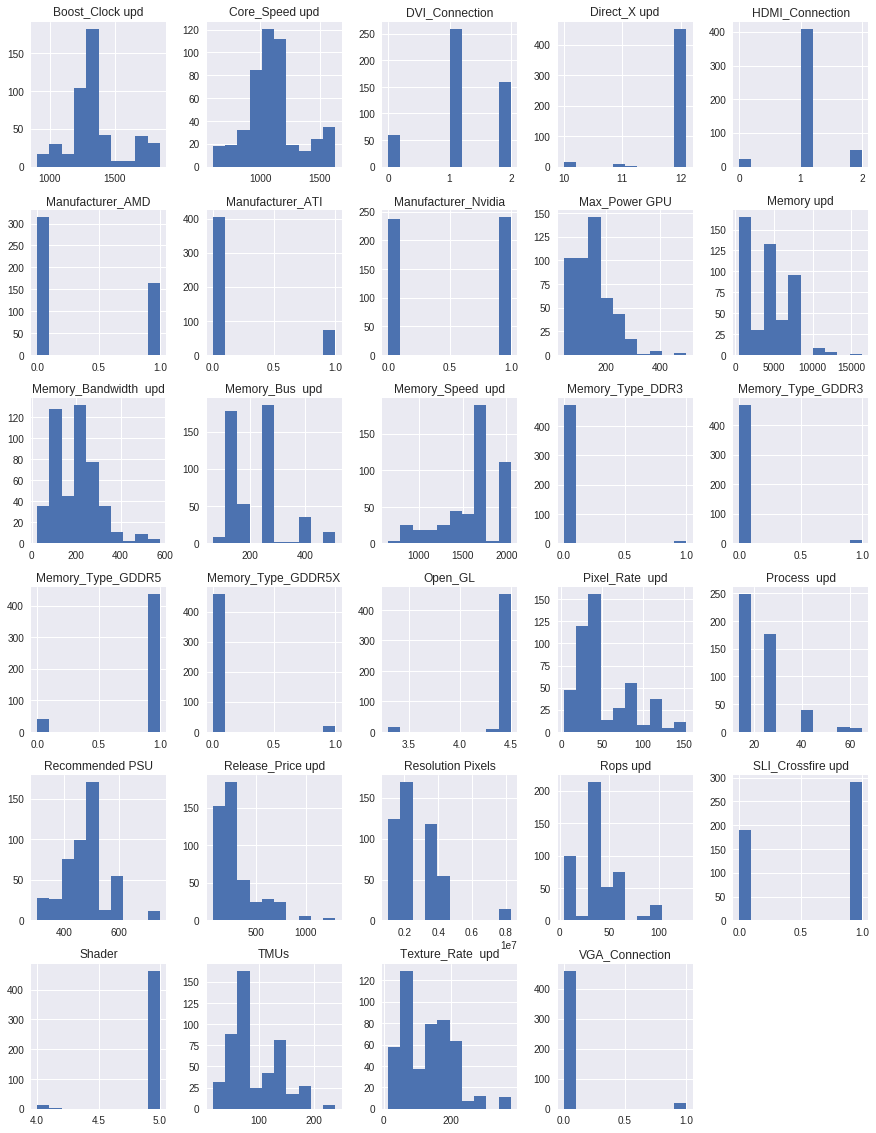

In [22]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
gpu_teste.hist(ax = ax)

Para análise do nosso target (Release Price), algumas features saltam logo a vista, como o Boost Clock ou Core Speed, já que representa imenso a capacidade da gráfica, mas tambem é necessário analisar outras features porque uma gráfica que possa ter sido lançada à 5 anos e outra lançada à 1 ano podem ter o mesmo Release Price por serem de gerações e épocas diferentes.

Poderiamos "limpar" melhor a nosso dataset, mas como já temos poucas Rows (479), se ainda diminuirmos ainda mais o dataset poderá ser ainda pior.





### Parte 2

In [0]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)


In [0]:
targets = np.array(gpu_teste['Release_Price upd'])
gpu_teste = gpu_teste.drop('Release_Price upd', axis = 1)
feature_list = list(gpu_teste.columns)
gpu_testee = np.array(gpu_teste)

Vamos criar a Learning Curve

In [25]:

train_sizes = [50, 100, 150, 200, 250, 300, 350]

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = gpu_testee,
                                                   y = targets, train_sizes = train_sizes, cv = 10,
                                                   scoring = 'neg_median_absolute_error')

train_sizess, train_scoress, validation_scoress = learning_curve(
                                                   estimator = RandomForestRegressor(), X = gpu_testee,
                                                   y = targets, train_sizes = train_sizes, cv = 10,
                                                   scoring = 'neg_median_absolute_error')

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

train_scores_meann = -train_scoress.mean(axis = 1)
validation_scores_meann = -validation_scoress.mean(axis = 1)

(0, 350)

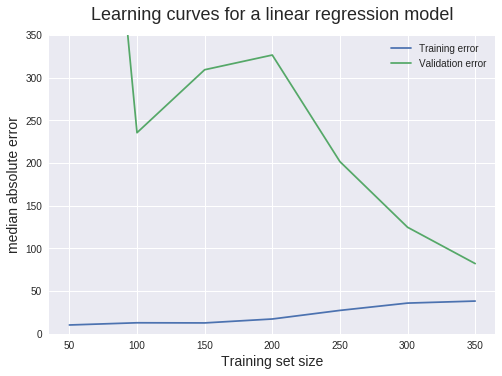

In [27]:
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('median absolute error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,350)

(0, 350)

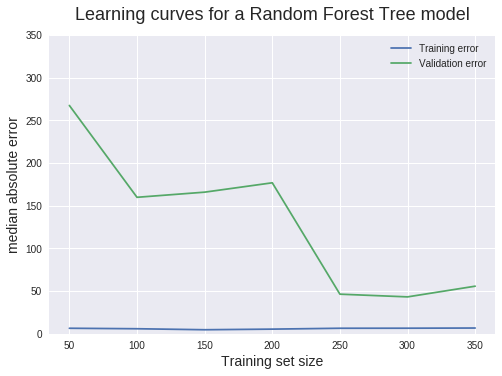

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizess, train_scores_meann, label = 'Training error')
plt.plot(train_sizess, validation_scores_meann, label = 'Validation error')

plt.ylabel('median absolute error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest Tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,350)

Podemos observar que para a Regressão Linear quanto maior o training size é, melhor.

Enquanto que para o RandomForest a partir das 300 já começa a existir o overfitting.

Como existe uma maior diferença Para a Regressão Linear, utilizaremos 360 como training set size (75%).

Random Forest

In [29]:
#split
train_features, test_features, train_labels, test_labels = train_test_split(gpu_testee, targets, test_size = 0.25, random_state = 42)

display('Training Features Shape:'+ str(train_features.shape))
display('Training Labels Shape:'+ str(train_labels.shape))
display('Testing Features Shape:'+ str(test_features.shape))
display('Testing Labels Shape:'+ str(test_labels.shape))

'Training Features Shape:(359, 28)'

'Training Labels Shape:(359,)'

'Testing Features Shape:(120, 28)'

'Testing Labels Shape:(120,)'

In [0]:
# Instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(train_features, train_labels);

In [31]:
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)

display('Erro medio: '+str(round((np.mean(errors)), 2))+'$')


'Erro medio: 33.73$'

In [32]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
display('Accuracy: '+ str(round(accuracy, 2))+ '%.')

'Accuracy: 87.79%.'

In [33]:
display("RMSE: "+ str(np.sqrt(metrics.mean_squared_error(predictions, test_labels))))

'RMSE: 65.48631504933462'

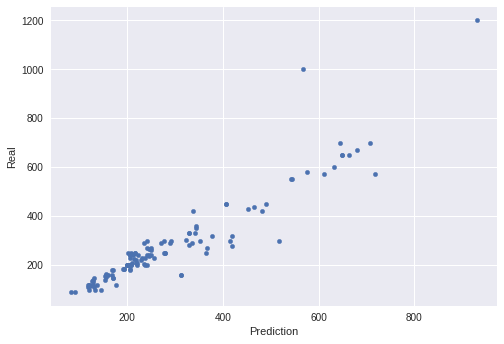

In [34]:

Values = pd.DataFrame({'Prediction':predictions, 'Real':test_labels})
Values = Values.sort_values(['Prediction'], ascending=[True])
Values.plot('Prediction', 'Real', kind='scatter')

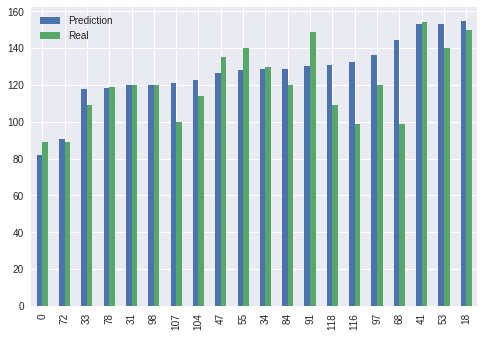

In [35]:
Values.cumsum()
Values.iloc[:20].plot(kind='bar');

Regressão Linear

In [36]:
regr = linear_model.LinearRegression()

regr.fit(test_features, test_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
predict = regr.predict(test_features)

# Erros absolutos
errorss = abs(predict - test_labels)

display('Erro medio: '+str(round(np.mean(errors), 2))+'$')

'Erro medio: 33.73$'

In [38]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errorss / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
display('Accuracy: '+ str(round(accuracy, 2))+ '%.')

'Accuracy: 85.04%.'

In [39]:
display("RMSE: "+ str(np.sqrt(metrics.mean_squared_error(predict, test_labels))))

'RMSE: 53.15574846824639'

Text(0.5,1,'Prices vs Predicted Prices')

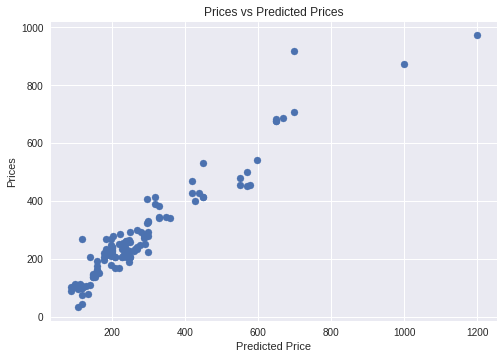

In [40]:
plt.scatter(test_labels, predict)
plt.xlabel("Predicted Price")
plt.ylabel("Prices")
plt.title("Prices vs Predicted Prices")

Alcançamos uma maior precisão com o Random Forest mas um menor RMSE.

Pela pequena "sample" de GPUs que poderiamos usar, terá afetado esta precisão, muito provavelmente com um maior número de GPUs poderiamos ter obtido uma melhor precisão, mas como o nosso target era o "Release_Price" fomos reduzidos logo aos 600GPUs.